In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/nndataset.zip"
extract_path = "/content/skin_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: /content/skin_dataset


In [ ]:
classes = os.listdir(os.path.join(extract_path, "IMG_CLASSES"))
print("Classes found:", classes)

for cls in classes:
    cls_path = os.path.join(extract_path, "IMG_CLASSES", cls)
    num_images = len(os.listdir(cls_path))
    print(f"{cls}: {num_images} images")

Classes found: ['10. Warts Molluscum and other Viral Infections - 2103', '4. Basal Cell Carcinoma (BCC) 3323', '2. Melanoma 15.75k', '1. Eczema 1677', '3. Atopic Dermatitis - 1.25k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '6. Benign Keratosis-like Lesions (BKL) 2624', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k', '5. Melanocytic Nevi (NV) - 7970']
10. Warts Molluscum and other Viral Infections - 2103: 2103 images
4. Basal Cell Carcinoma (BCC) 3323: 3323 images
2. Melanoma 15.75k: 3140 images
1. Eczema 1677: 1677 images
3. Atopic Dermatitis - 1.25k: 1257 images
8. Seborrheic Keratoses and other Benign Tumors - 1.8k: 1847 images
7. Psoriasis pictures Lichen Planus and related diseases - 2k: 2055 images
6. Benign Keratosis-like Lesions (BKL) 2624: 2079 images
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k: 1702 images
5. Melanocytic Nevi (NV) - 7970: 7970 images


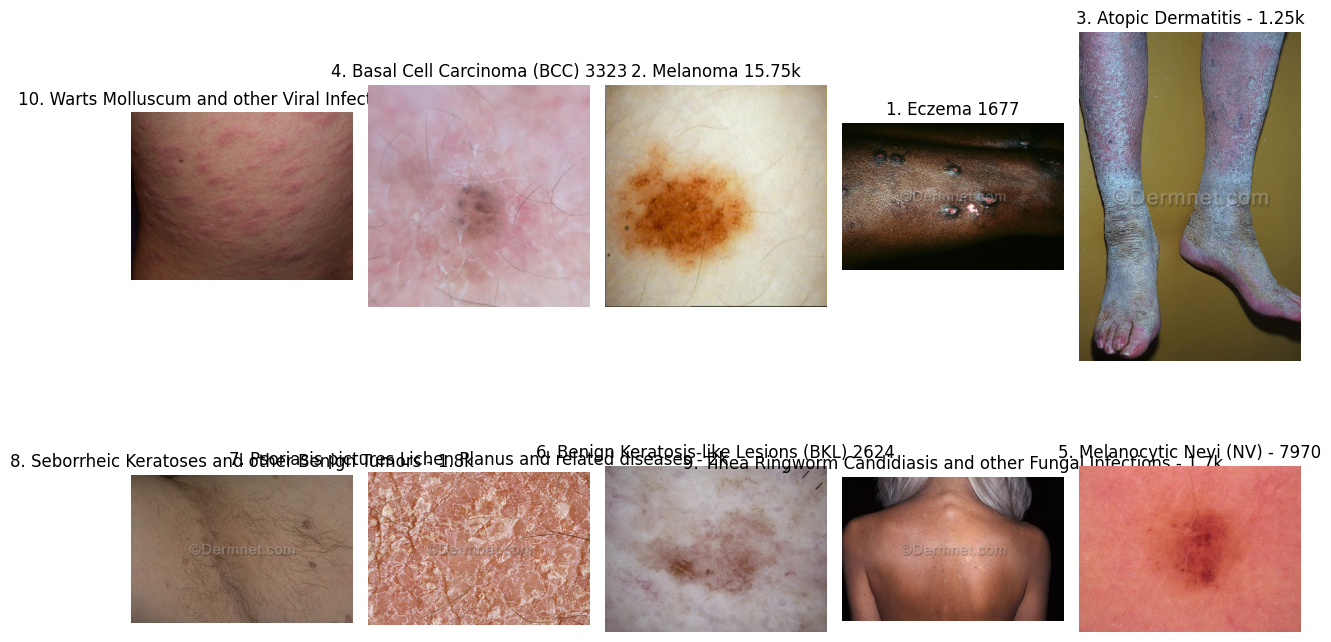

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
import random

plt.figure(figsize=(12,8))
for i, cls in enumerate(classes):
    class_dir = os.path.join(extract_path, "IMG_CLASSES", cls)
    imgs = os.listdir(class_dir)
    img_path = os.path.join(class_dir, random.choice(imgs))
    plt.subplot(2, 5, i+1)
    plt.imshow(load_img(img_path))
    plt.title(cls)
    plt.axis('off')
plt.tight_layout()
plt.show()

Unique image sizes: 390
Aspect ratio stats:
count    27153.000000
mean         1.244216
std          0.250456
min          0.623611
25%          1.000000
50%          1.333333
75%          1.484536
max          1.632653
Name: aspect_ratio, dtype: float64


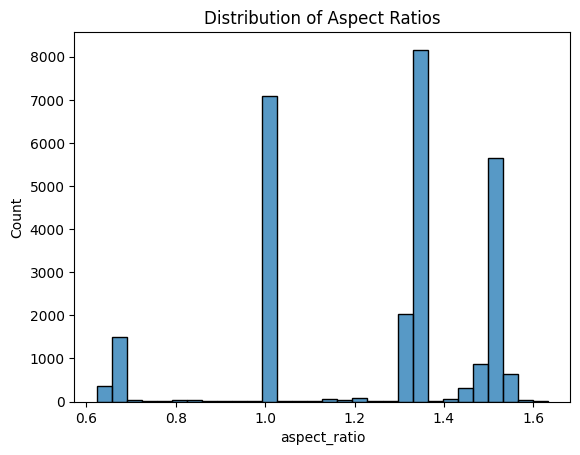

In [16]:
from PIL import Image
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt #

sizes = []
for cls in classes:
    class_dir = os.path.join(extract_path, "IMG_CLASSES", cls)
    for img_file in os.listdir(class_dir):
        img = Image.open(os.path.join(class_dir, img_file))
        sizes.append(img.size)

df_sizes = pd.DataFrame(sizes, columns=['width','height'])
df_sizes['aspect_ratio'] = df_sizes['width'] / df_sizes['height']

print("Unique image sizes:", df_sizes[['width','height']].drop_duplicates().shape[0])
print("Aspect ratio stats:")
print(df_sizes['aspect_ratio'].describe())

# Plot distribution of aspect ratios
sns.histplot(df_sizes['aspect_ratio'], bins=30)
plt.title("Distribution of Aspect Ratios")
plt.show()

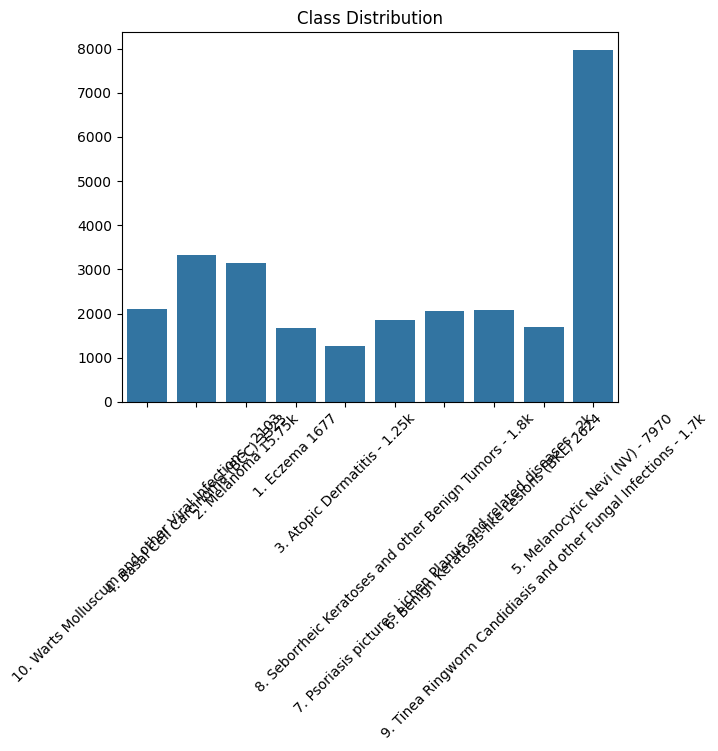

In [14]:
import seaborn as sns
import os
import matplotlib.pyplot as plt

class_counts = {cls: len(os.listdir(os.path.join(extract_path, "IMG_CLASSES", cls))) for cls in classes}
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()